In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df_2 = pd.read_csv("cost_2.dat",delimiter = ' ', names = ["i","j","mse"])

In [16]:
df_3 = pd.read_csv("cost_3.dat",delimiter = ' ', names = ["i","j","mse"])

In [20]:
df_diff = df_2.copy()
df_diff["mse"] = df_diff["mse"].subtract(df_3["mse"])

In [24]:
mat = np.empty((10,10))
mat[:] = np.NaN

In [31]:
for _,row in df_diff.iterrows():
    mat[int(row["i"])-1,int(row["j"])-1] = row["mse"]

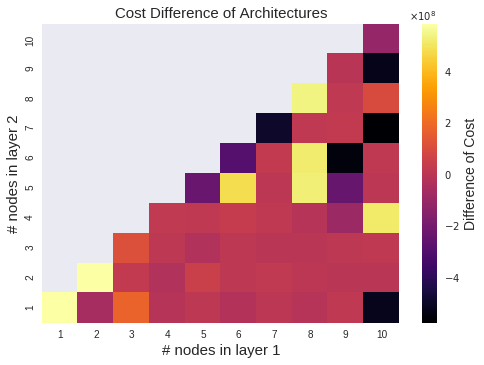

In [58]:
mat_t = np.transpose(mat)

import matplotlib.ticker as tkr

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)


ax=sns.heatmap(mat_t,cmap='inferno',robust=True,cbar_kws={"format": formatter})
ax.set_xticklabels(range(1,11))
ax.set_yticklabels(range(10,0,-1))
ax.invert_yaxis()

ax.set_xlabel('# nodes in layer 1',fontsize=15)
ax.set_ylabel('# nodes in layer 2',fontsize=15)
ax.set_title('Cost Difference of Architectures',fontsize=15)

cbar = ax.collections[0].colorbar
cbar.set_label(label='Difference of Cost',size=14)

ax.figure.savefig('cost_diff.png',dpi=1000)